In [ ]:
!pip install NetCDF4

     |████████████████████████████████| 4.1MB 2.7MB/s 
     |████████████████████████████████| 327kB 35.5MB/s 


In [ ]:
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from netCDF4 import Dataset, num2date

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (61.7 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pr

In [ ]:
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

# Load Data

In [ ]:
# nc_f_low="/content/drive/My Drive/ISRO SAC Off Campus/sst5km.nc"
nc_f_low="/content/drive/My Drive/ISRO SAC Off Campus/sst25km_sm5km.nc"
nc_low = Dataset(nc_f_low, 'r')  # Dataset is the class behavior to open the file and create an instance of the ncCDF4 class

# Extract data from NetCDF file
lats = nc_low.variables['LAT'][:]  # extract/copy the data
lons = nc_low.variables['LON'][:]
time = nc_low.variables['time'][:]
units = nc_low.variables['time'].units
dtime = num2date(time[:], units=units, calendar='365_day')

sst_field_low = nc_low.variables['sst'][:]  # shape is time, lat, lon as shown above

In [ ]:
# nc_f_high = '/content/drive/My Drive/ISRO SAC Off Campus/sst1km_comp.nc'  # Your 
nc_f_high="/content/drive/My Drive/ISRO SAC Off Campus/sst5km.nc"
nc_high = Dataset(nc_f_high, 'r')  # Dataset is the class behavior to open the file and create an instance of the ncCDF4 class

# Extract data from NetCDF file
lats = nc_high.variables['LAT'][:]  # extract/copy the data
lons = nc_high.variables['LON'][:]
time = nc_high.variables['TIME'][:]
sst_field_high = nc_high.variables['SST'][:] 


In [ ]:
# nc_f_predict = '/content/drive/My Drive/ISRO SAC Off Campus/5km/sstall.nc'  # Your filename
nc_f_predict = '/content/drive/My Drive/ISRO SAC Off Campus/5km/Train Prediction Day 0/sst_'  # Your filename
nc_predict = Dataset(nc_f_predict, 'r')  # Dataset is the class behavior to open the file and create an instance of the ncCDF4 class

# Extract data from NetCDF file
lats = nc_predict.variables['LAT'][:]  # extract/copy the data
lons = nc_predict.variables['LON'][:]
time = nc_predict.variables['TIME'][:]
sst_field_predict = nc_predict.variables['SST_PREDICT'][:]  # shape is time, lat, lon as shown above

# SST Fields

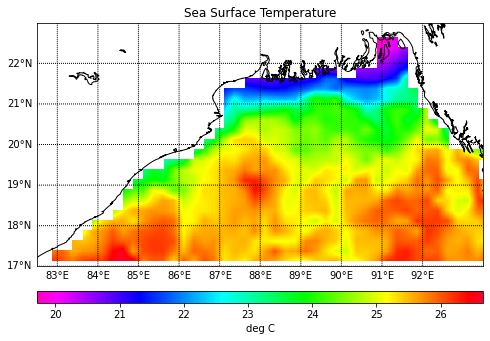

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=214

# Plot Data
cs = m.pcolor(xi,yi,sst_field_low[time_idx], cmap='gist_rainbow_r')

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)

# Add Title
plt.title('Sea Surface Temperature')

plt.show()

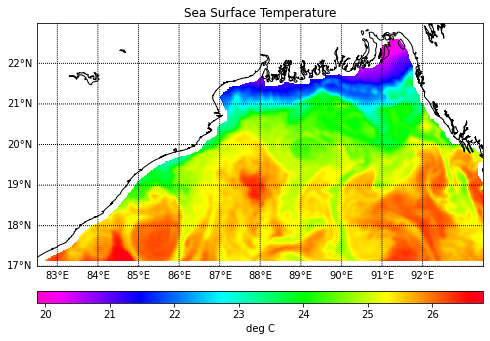

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=52

# Plot Data
cs = m.pcolor(xi,yi,sst_field_predict[time_idx], cmap='gist_rainbow_r')

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)

# Add Title
plt.title('Sea Surface Temperature')

plt.show()

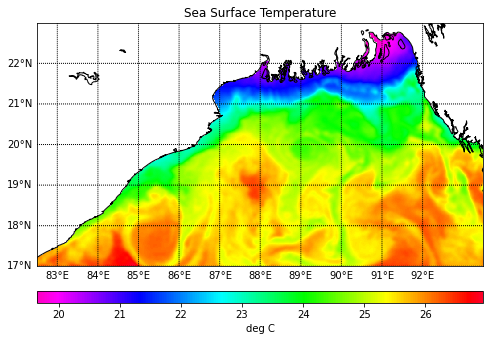

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=214

# Plot Data
cs = m.pcolor(xi,yi,sst_field_high[time_idx], cmap='gist_rainbow_r')

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)

# Add Title
plt.title('Sea Surface Temperature')

plt.show()

# Gradients

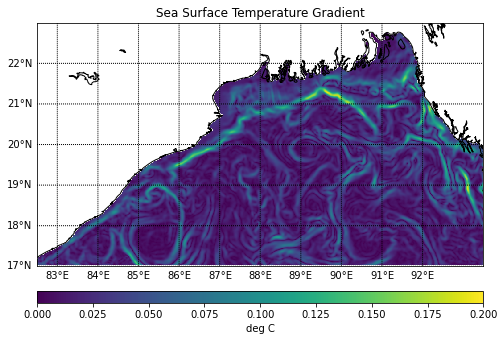

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=214

gradient=np.gradient(sst_field_low[time_idx])
sobel=np.hypot(gradient[0],gradient[1])
# plt.pcolormesh(sobel)
# plt.clim(vmin=0.020, vmax=0.2)
# plt.colorbar()

# Plot Data
cs = m.pcolor(xi,yi,sobel)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=0.0, vmax=0.2)

# Add Title
plt.title('Sea Surface Temperature Gradient')

plt.show()

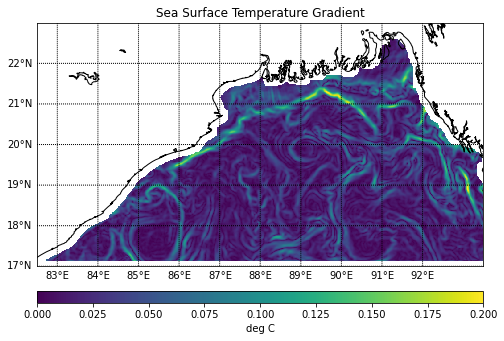

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=52

gradient=np.gradient(sst_field_predict[time_idx])
sobel=np.hypot(gradient[0],gradient[1])

# Plot Data
cs = m.pcolor(xi,yi,sobel)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=0.0, vmax=0.2)

# Add Title
plt.title('Sea Surface Temperature Gradient')

plt.show()

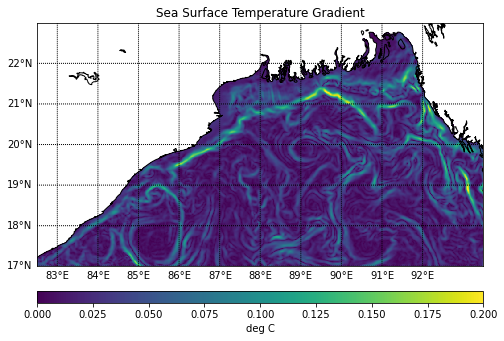

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=214

gradient=np.gradient(sst_field_high[time_idx])
sobel=np.hypot(gradient[0],gradient[1])
# plt.pcolormesh(sobel)
# plt.clim(vmin=0.020, vmax=0.2)
# plt.colorbar()

# Plot Data
cs = m.pcolor(xi,yi,sobel)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=0.0, vmax=0.2)

# Add Title
plt.title('Sea Surface Temperature Gradient')

plt.show()

# Image Difference

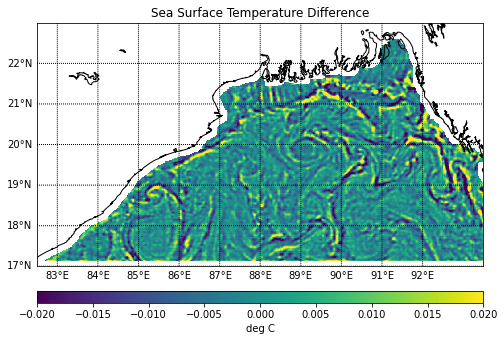

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

difference=sst_field_predict[52]-sst_field_low[214]
# Plot Data
cs = m.pcolor(xi,yi,difference)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=-0.02, vmax=0.02)

# Add Title
plt.title('Sea Surface Temperature Difference')

plt.show()

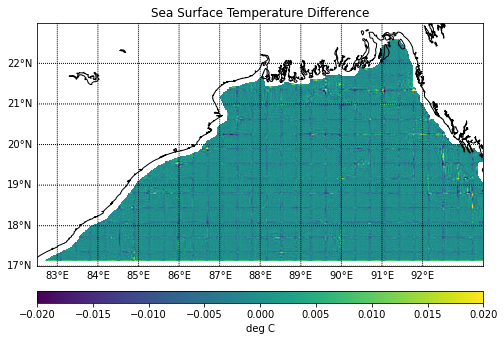

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

difference=sst_field_predict[52]-sst_field_high[214]
# Plot Data
cs = m.pcolor(xi,yi,difference)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=-0.02, vmax=0.02)

# Add Title
plt.title('Sea Surface Temperature Difference')

plt.show()

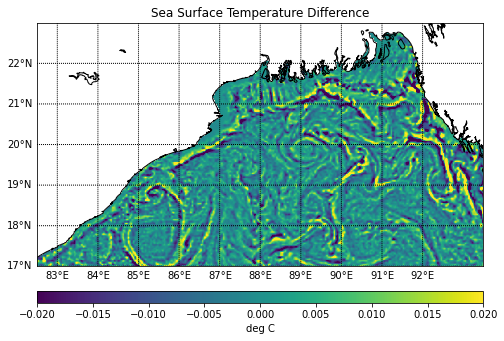

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

difference=sst_field_low[214]-sst_field_high[214]
# Plot Data
cs = m.pcolor(xi,yi,difference)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=-0.02, vmax=0.02)

# Add Title
plt.title('Sea Surface Temperature Difference')

plt.show()

# Mean SST

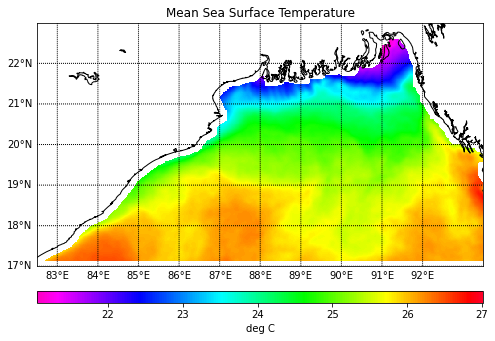

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

sst_mean=np.ma.mean(sst_field_predict, axis=0)

# Plot Data
cs = m.pcolor(xi,yi,sst_mean, cmap='gist_rainbow_r')

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)

# Add Title
plt.title('Mean Sea Surface Temperature')

plt.show()

# Gradient of Mean SST 

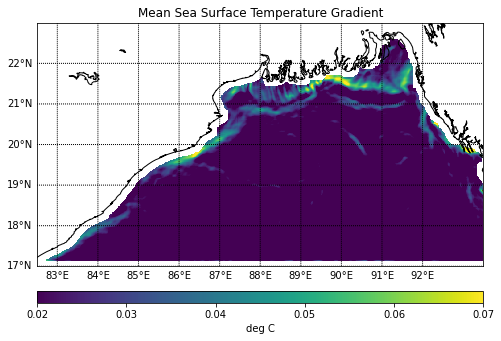

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

time_idx=162

gradient=np.gradient(sst_mean)
sobel=np.hypot(gradient[0],gradient[1])
# plt.pcolormesh(sobel)
# plt.clim(vmin=0.020, vmax=0.2)
# plt.colorbar()

# Plot Data
cs = m.pcolor(xi,yi,sobel)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=0.02, vmax=0.07)

# Add Title
plt.title('Mean Sea Surface Temperature Gradient')

plt.show()

# Bias

In [ ]:
sst_void=np.zeros((sst_field_predict.shape[0], sst_field_predict.shape[1], sst_field_predict.shape[2]))
sst_difference=np.ma.array(sst_void, mask=False)

In [ ]:
j=0
for i in range(162, 240):
  sst_difference[j]=sst_field_predict[j]-sst_field_high[i]
  j=j+1

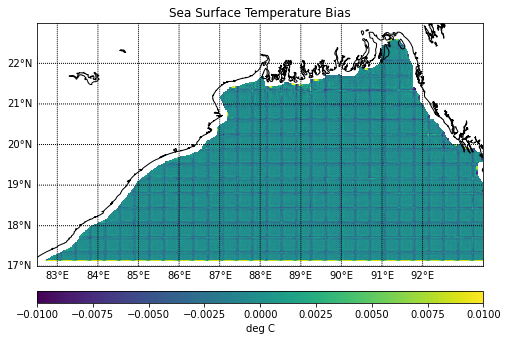

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
sst_bias=np.ma.mean(sst_difference, axis=0)

cs = m.pcolor(xi,yi,sst_bias)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=-0.01, vmax=0.01)

# Add Title
plt.title('Sea Surface Temperature Bias')

plt.show()

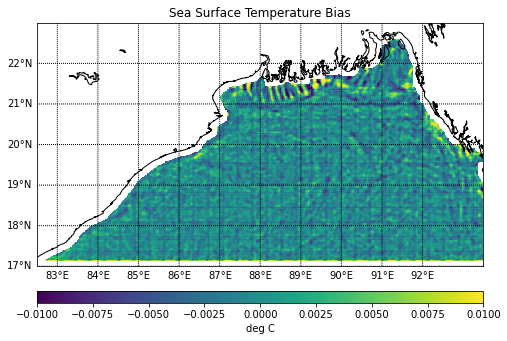

In [ ]:
sst_void=np.zeros((sst_field_predict.shape[0], sst_field_predict.shape[1], sst_field_predict.shape[2]))
sst_diff_predict_low=np.ma.array(sst_void, mask=False)

j=0
for i in range(162, 240):
  sst_diff_predict_low[j]=sst_field_predict[j]-sst_field_low[i]
  j=j+1

plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
sst_bias_predict_low=np.ma.mean(sst_diff_predict_low, axis=0)

cs = m.pcolor(xi,yi,sst_bias_predict_low)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=-0.01, vmax=0.01)

# Add Title
plt.title('Sea Surface Temperature Bias')

plt.show()

# RMSE Map

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.ma.mean(np.square(y_pred - y_true), axis=0))

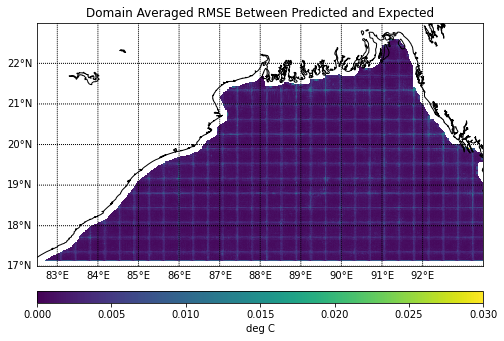

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
rmse_error=rmse(sst_field_predict[0:78], sst_field_high[162:240])

cs = m.pcolor(xi,yi,rmse_error)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=-0.0, vmax=0.03)

# Add Title
plt.title('Domain Averaged RMSE Between Predicted and Expected')

plt.show()

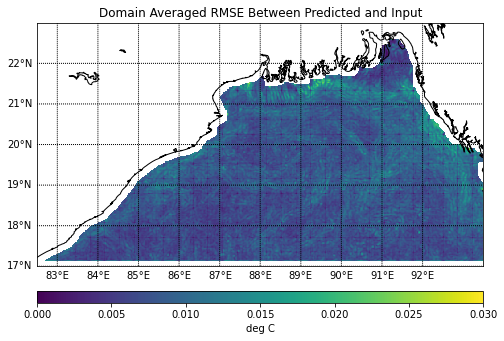

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
rmse_error=rmse(sst_field_predict, sst_field_low[162:240])

cs = m.pcolor(xi,yi,rmse_error)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=0.0, vmax=0.03)

# Add Title
plt.title('Domain Averaged RMSE Between Predicted and Input')

plt.show()

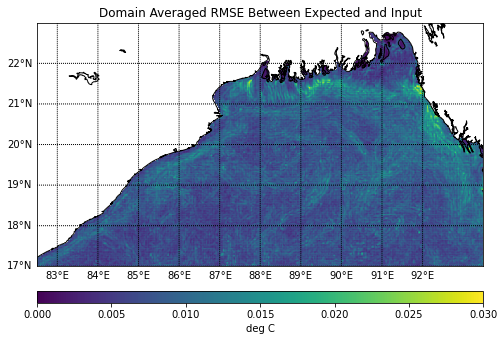

In [ ]:
plt.figure(figsize=(8,10))

m = Basemap( projection='cyl', llcrnrlat=17, urcrnrlat=23,\
            llcrnrlon=82.5, urcrnrlon=93.5, resolution='h', lon_0=0)


# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
rmse_error=rmse(sst_field_high[162:240], sst_field_low[162:240])

cs = m.pcolor(xi,yi,rmse_error)

# Add Grid Lines
m.drawparallels(np.arange(17., 23., 1.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(82., 93., 1.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
sst_units = 'deg C'

# sst_units = nc_high.variables['sst'].units

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)
plt.clim(vmin=0.0, vmax=0.03)

# Add Title
plt.title('Domain Averaged RMSE Between Expected and Input')

plt.show()